## Find restaurants near a business hub for site suitability in Chicago

In [23]:
from pyplaces import overture_maps as om
import folium

In [32]:
def plot_geodataframes(gdfs, zoom_start=14, popup_columns=None):
    if not isinstance(gdfs, list):
        gdfs = [gdfs]
    if popup_columns is None:
        popup_columns = [None] * len(gdfs)

    # Filter out empty GeoDataFrames
    gdfs_filtered = [(gdf, popup_columns[i]) for i, gdf in enumerate(gdfs) if not gdf.empty]

    if not gdfs_filtered:
        print("All GeoDataFrames are empty.")
        return None

    # Center the map at the centroid of the first non-empty GeoDataFrame
    center = gdfs_filtered[0][0].geometry.unary_union.centroid
    m = folium.Map(location=[center.y, center.x], zoom_start=zoom_start, tiles="CartoDB positron")

    for gdf, popup_col in gdfs_filtered:
        # Check if all geometries are Points
        if gdf.geometry.geom_type.isin(['Point']).all():
            for _, row in gdf.iterrows():
                coords = [row.geometry.y, row.geometry.x]
                popup = str(row[popup_col]) if popup_col and popup_col in row else None
                folium.CircleMarker(
                    location=coords,
                    radius=1,   # size of the dot
                    color='green',
                    fill=True,
                    fill_color='green',
                    fill_opacity=1,
                    popup=popup
                ).add_to(m)
        else:
            # Otherwise treat as polygon or line geometries
            if popup_col and popup_col in gdf.columns:
                folium.GeoJson(
                    gdf,
                    tooltip=folium.GeoJsonTooltip(fields=[popup_col], aliases=['Name:']),
                    popup=folium.GeoJsonPopup(fields=[popup_col])
                ).add_to(m)
            else:
                folium.GeoJson(gdf).add_to(m)

    return m

In [25]:
# Get all restaurants in the Near West Side
gdf_food = om.overture_places_from_place("Near West Side, Chicago, IL",filters=[("categories.primary","contains","restaurant")])

# Filter buildings by height
gdf_buildings = om.overture_buildings_from_place(
    address="Near West Side, Chicago, IL",
    filters=[("num_floors", ">=", 5)]
)

In [26]:
gdf_food["name"] = gdf_food["names"].apply(lambda x: x["primary"])

In [27]:
gdf_food

,id,geometry,bbox,version,sources,names,categories,confidence,websites,socials,emails,phones,brand,addresses,name
3,08f2664cab32432a039d3a31a79f59d7,POINT (-87.68687 41.86291),"{'xmin': -87.68687438964844, 'xmax': -87.68685...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'El Ideas', 'common': None, 'rules...","{'primary': 'american_restaurant', 'alternate'...",0.978172,[http://www.elideas.com/],[https://www.facebook.com/209428082411028],None,[+13122268144],None,"[{'freeform': '2419 W 14th St', 'locality': 'C...",El Ideas
4,08f2664caba812d4031aedbaee003b01,POINT (-87.68645 41.86409),"{'xmin': -87.68645477294922, 'xmax': -87.68643...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Burger King', 'common': None, 'ru...","{'primary': 'fast_food_restaurant', 'alternate...",0.994980,[https://burgerking.com/store-locator/store/re...,[https://www.facebook.com/895628703864497],None,[+13122435293],"{'wikidata': None, 'names': {'primary': 'Burge...","[{'freeform': '2401 W Ogden Ave', 'locality': ...",Burger King
5,08f2664caba3274c03df8f43e1d7c6d3,POINT (-87.68414 41.86549),"{'xmin': -87.68415069580078, 'xmax': -87.68414...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'McDonald's', 'common': None, 'rul...","{'primary': 'fast_food_restaurant', 'alternate...",0.994980,[https://www.mcdonalds.com/us/en-us/location/i...,[https://www.facebook.com/372215050276943],None,[+13127337712],"{'wikidata': None, 'names': {'primary': 'McDon...","[{'freeform': '2315 W Ogden Ave', 'locality': ...",McDonald's
6,08f2664cabb9c14d030d1bee6d321c3f,POINT (-87.68631 41.86711),"{'xmin': -87.68630981445312, 'xmax': -87.68629...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'KFC', 'common': None, 'rules': None}","{'primary': 'fast_food_restaurant', 'alternate...",0.994980,[https://locations.kfc.com/il/chicago/1144-s-w...,[https://www.facebook.com/176694659151249],None,[+13126009353],"{'wikidata': None, 'names': {'primary': 'KFC',...","[{'freeform': '1144 S Western Ave', 'locality'...",KFC
7,08f2664cabb8840503bf06ffa2d6f115,POINT (-87.6852 41.86647),"{'xmin': -87.6852035522461, 'xmax': -87.685195...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'The Dopest Bar and Grill', 'commo...","{'primary': 'bar_and_grill_restaurant', 'alter...",0.978172,[http://www.thedopestbar.com],[https://www.facebook.com/104856918532349],None,[+13122919297],None,"[{'freeform': '2343 W Roosevelt Rd', 'locality...",The Dopest Bar and Grill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,08f2664cada51baa03af71e70a9c24a7,POINT (-87.64266 41.88754),"{'xmin': -87.64266967773438, 'xmax': -87.64266...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Jefferson Tap & Grille', 'common'...","{'primary': 'american_restaurant', 'alternate'...",0.996163,[https://jeffersontap.com/],[https://www.facebook.com/145886722124223],None,[+13126480100],None,"[{'freeform': '325 N Jefferson St', 'locality'...",Jefferson Tap & Grille
537,08f2664c1ad3360e03af0b701500b1fa,POINT (-87.63951 41.88582),"{'xmin': -87.63951110839844, 'xmax': -87.63950...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Market Creations', 'common': None...","{'primary': 'asian_restaurant', 'alternate': [...",0.978172,[http://www.marketcreationscafe.com/],[https://www.facebook.com/1993344644323562],None,[+13125263357],"{'wikidata': None, 'names': {'primary': 'Marke...","[{'freeform': '444 W Lake St', 'locality': 'Ch...",Market Creations
538,08f2664c1ad32453037d6a28a27b6bf4,POINT (-87.63998 41.88638),"{'xmin': -87.6399917602539, 'xmax': -87.639976...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Taste 222', 'common': None, 'rule...","{'primary': 'american_restaurant', 'alternate'...",0.978172,[https://www.taste222chicago.com/privateevents],[https://www.facebook.com/1358835220871155],None,[+13123836620],None,"[{'freeform': '222 N Canal St', 'locality': 'C...

In [28]:
gdf_food[["id","geometry",'name']]

,id,geometry,name
3,08f2664cab32432a039d3a31a79f59d7,POINT (-87.68687 41.86291),El Ideas
4,08f2664caba812d4031aedbaee003b01,POINT (-87.68645 41.86409),Burger King
5,08f2664caba3274c03df8f43e1d7c6d3,POINT (-87.68414 41.86549),McDonald's
6,08f2664cabb9c14d030d1bee6d321c3f,POINT (-87.68631 41.86711),KFC
7,08f2664cabb8840503bf06ffa2d6f115,POINT (-87.6852 41.86647),The Dopest Bar and Grill
...,...,...,...
536,08f2664cada51baa03af71e70a9c24a7,POINT (-87.64266 41.88754),Jefferson Tap & Grille
537,08f2664c1ad3360e03af0b701500b1fa,POINT (-87.63951 41.88582),Market Creations
538,08f2664c1ad32453037d6a28a27b6bf4,POINT (-87.63998 41.88638),Taste 222
539,08f2664c1ad362c6039de4eec4d6f29b,POINT (-87.63971 41.88656),Gibsons Italia


In [29]:
gdf_buildings[["id","subtype","geometry"]]

,id,subtype,geometry
1,08b2664caba0cfff0200e24d7de9b351,None,"POLYGON ((-87.6822 41.86477, -87.68219 41.8644..."
2,08b2664cabb51fff020024e93d868f0d,commercial,"POLYGON ((-87.68049 41.86572, -87.6805 41.8653..."
3,08b2664cabb03fff0200e6a859c4e513,civic,"POLYGON ((-87.68272 41.86696, -87.6827 41.8669..."
4,08b2664ca945afff0200eb6ae5bb318a,education,"POLYGON ((-87.67532 41.86818, -87.67532 41.868..."
5,08b2664ca9710fff0200de34c402bf72,None,"POLYGON ((-87.67152 41.86755, -87.6718 41.8675..."
...,...,...,...
361,08b2664cada40fff02009518762742a3,residential,"POLYGON ((-87.64176 41.88769, -87.64152 41.887..."
362,08b2664c1ad33fff020014c1d2b87130,commercial,"POLYGON ((-87.6396 41.88595, -87.63953 41.8858..."
363,08b2664cada6bfff02005a09606d1a2c,residential,"POLYGON ((-87.64021 41.88736, -87.64059 41.887..."
364,08b2664cada6dfff0200f75f8de2767f,residential,"POLYGON ((-87.63964 41.88782, -87.63975 41.887..."


In [34]:
m = plot_geodataframes([gdf_food[["id","geometry",'name']],gdf_buildings[["id","subtype","geometry"]],],popup_columns=["name","subtype"])
m

C:\Users\tedba\AppData\Local\Temp\ipykernel_16876\143141007.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = gdfs_filtered[0][0].geometry.unary_union.centroid


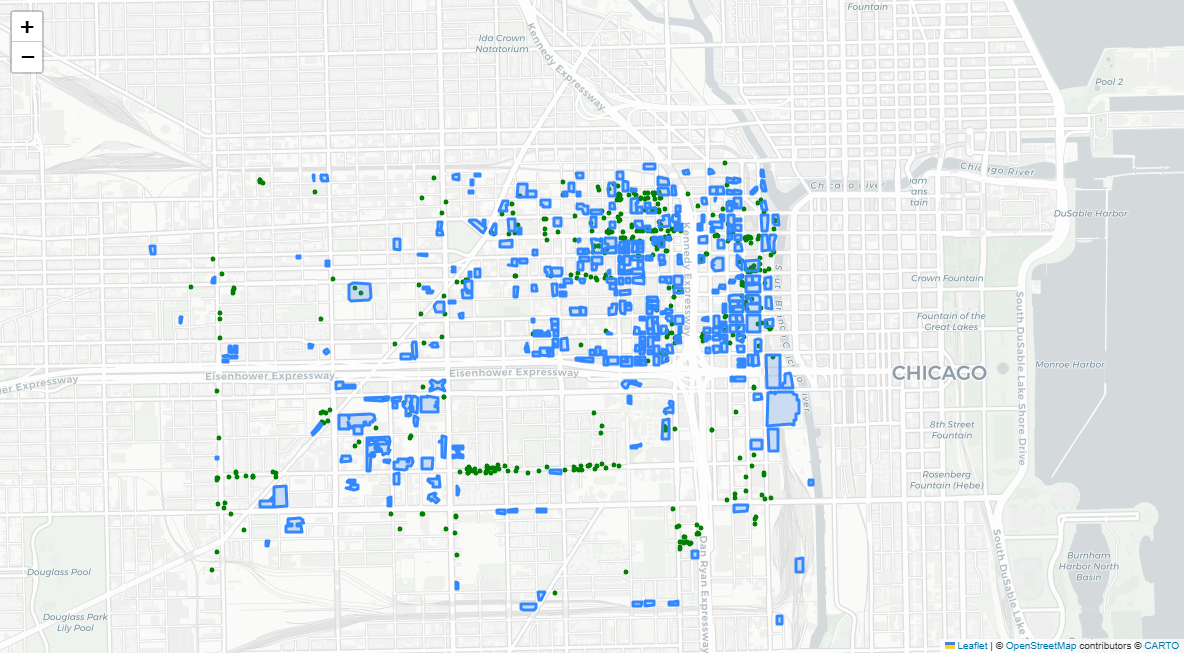

In [35]:
# Final cell to add to your notebook that will output a PNG of your Folium map

# First, save your map to an HTML file
map_html = 'temp_map.html'
m.save(map_html)  # Replace 'my_map' with your actual map variable name

# Use Selenium to convert the map to a PNG image
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
from IPython.display import Image

# Configure Chrome in headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1200,800")  # Adjust size as needed
driver = webdriver.Chrome(options=chrome_options)

# Load the HTML file
driver.get(f'file://{os.path.abspath(map_html)}')
time.sleep(2)  # Allow the map to fully render

# Take the screenshot
thumbnail_path = 'map_thumbnail4.png'
driver.save_screenshot(thumbnail_path)
driver.quit()

# Clean up the temporary HTML file
os.remove(map_html)

# Display the image - this will be the cell output that Sphinx can use
Image(filename=thumbnail_path)